In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [15]:
toyota = pd.read_csv('C:/Users/Anirudh MV/Downloads/ToyotaCorolla.csv',encoding='unicode_escape')

In [16]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [17]:
toyota1 = toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [19]:
df = toyota1.rename(columns={"Age_08_04":"Age"})

In [20]:
df.count()

Price            1436
Age              1436
KM               1436
HP               1436
cc               1436
Doors            1436
Gears            1436
Quarterly_Tax    1436
Weight           1436
dtype: int64

In [23]:
df.isnull().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [25]:
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [26]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [28]:
df.dtypes

Price            int64
Age              int64
KM               int64
HP               int64
cc               int64
Doors            int64
Gears            int64
Quarterly_Tax    int64
Weight           int64
dtype: object

In [29]:
corr = df.corr()

<AxesSubplot:>

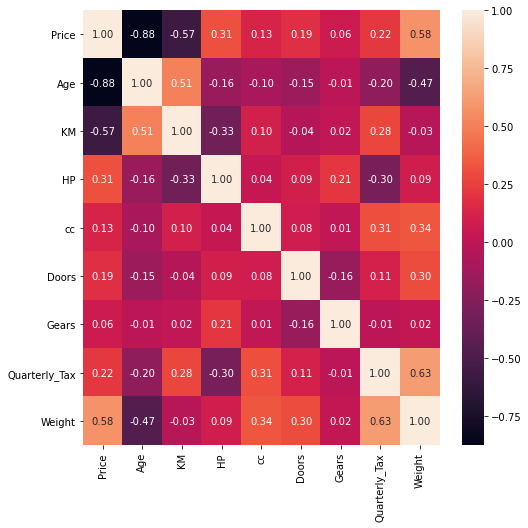

In [31]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True,fmt= ".2f")

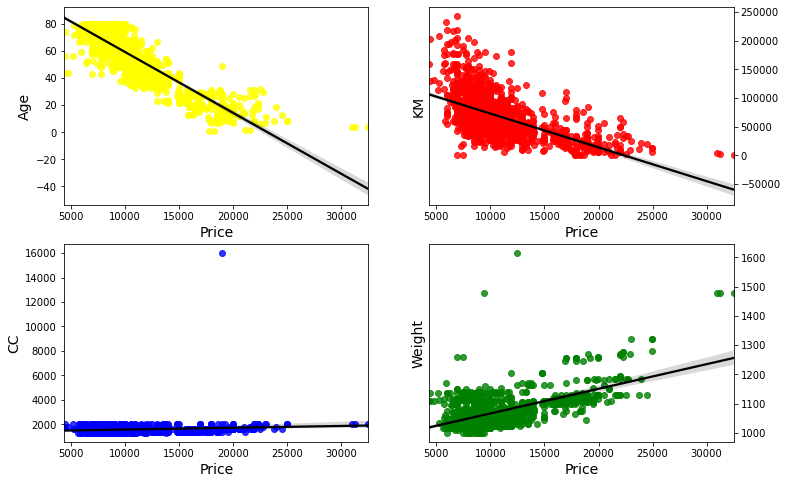

In [43]:
#plots for regplots for Age,KM,cc & HP against Price
f, axes = plt.subplots(2,2, figsize=(12,8))
# Age Vs Price
sns.regplot(x = 'Price',y= 'Age', data = df,ax = axes[0,0], scatter_kws={"color":"yellow"}, line_kws={"color": "black"})
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age',fontsize=14)
axes[0,0].yaxis.tick_left()

#KM VS Price
sns.regplot(x = 'Price',y= 'KM', data = df,ax = axes[0,1], scatter_kws={"color":"red"}, line_kws={"color": "black"})
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM',fontsize=14)
axes[0,1].yaxis.tick_right()

#CC VS Price
sns.regplot(x = 'Price',y= 'cc', data = df,ax = axes[1,0], scatter_kws={"color":"blue"}, line_kws={"color": "black"})
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('CC', fontsize=14)
axes[1,0].yaxis.tick_left()

#Weight vs Price
sns.regplot(x = 'Price',y= 'Weight', data = df,ax = axes[1,1], scatter_kws={"color":"green"}, line_kws={"color": "black"})
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight',fontsize=14)
axes[1,1].yaxis.tick_right()

plt.show()





In [44]:
df = pd.get_dummies(df)

In [45]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [50]:
X_lr = df.drop('Price', axis = 1).values
y_lr = df["Price"]

In [52]:
X_lr,X_lr, y_lr, y_lr = train_test_split(X_lr,y_lr, test_size = 0.25 , random_state = 4)

In [53]:
print('Train Dataset :',X_lr.shape, y_lr.shape)
print('Test Dataset :', X_lr.shape, y_lr.shape)

Train Dataset : (359, 8) (359, 1)
Test Dataset : (359, 8) (359, 1)


In [55]:
import statsmodels.api as sm
mlr = sm.OLS(y_lr,X_lr).fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              3415.
Date:                Sun, 27 Jun 2021   Prob (F-statistic):                        0.00
Time:                        20:02:01   Log-Likelihood:                         -3088.5
No. Observations:                 359   AIC:                                      6193.
Df Residuals:                     351   BIC:                                      6224.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          -126.5006      4.571    -27.672      0.000    -135.492    -117.510
x2            -0.0188      0.003     -7.210      0.000      -0.024      -0.014
x3            43.6292      5.491      7.945      0.000      32.829      54.430
x4            -2.2139      0.600     -3.692      0.000      -3.393      -1.034
x5           -26.7100     78.706     -0.339      0.735    -181.506     128.086
x6           -20.5662    258.539     -0.080      0.937    -529.047     487.915
x7            12.6143      2.469      5.108      0.000       7.758      17.471
x8            16.1768      1.423     11.369      0.000      13.378      18.975
==============================================================================
Omnibus:                       22.373   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.409
Skew:                           0.043   Prob(JB):                     1.89e-16
Kurtosis:                       5.198   Cond. No.                     2.80e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""